# R Graphics Exercise (Solutions)

In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.2
✔ tibble  2.1.2     ✔ dplyr   0.8.1
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
options(repr.plot.width=4, repr.plot.height=3)

In [3]:
data <- read_tsv('data/gene_counts_raw.txt')

Parsed with column specification:
cols(
  .default = col_double(),
  Label = col_character(),
  Media = col_character(),
  Strain = col_character()
)
See spec(...) for full column specifications.


**0**. The `Label` column has 3 pieces of information `Sample`, `Method` andd `Person` in a single cell. Fix this and save the tidy DataFrame as `df`.

In [4]:
data[1:3, 1:5]

Label  Media Strain gene0 gene1
1 1_MA_J YPD   H99    1     0    
2 1_RZ_J YPD   H99    0     0    
3 2_MA_C YPD   H99    0     0

In [5]:
n <- ncol(data)
data[1:3, (n-4):n]

gene995 gene996 gene997 gene998 gene999
1 27      325     637     591      848   
2  7      227     508     345      641   
3 31      295     737     738     1006

In [6]:
data %>%
separate(Label, sep='_', into=c("Sample", "Method", "Person")) %>%
select(1:5) %>%
head(3)

Sample Method Person Media Strain
1 1      MA     J      YPD   H99   
2 1      RZ     J      YPD   H99   
3 2      MA     C      YPD   H99

In [7]:
data %>%
separate(Label, sep='_', into=c("Sample", "Method", "Person")) -> df

In [8]:
df %>% 
select(1:8) %>% 
head

Sample Method Person Media Strain gene0 gene1 gene10
1 1      MA     J      YPD   H99     1    0     13    
2 1      RZ     J      YPD   H99     0    0     14    
3 2      MA     C      YPD   H99     0    0     10    
4 2      RZ     C      YPD   H99    10    0     18    
5 2      TOT    C      YPD   H99     1    0      0    
6 3      MA     J      YPD   H99     0    0      8

**1**. Plot a scatter plot of gene100 against gene 1001. Color points by the method used. Save the image as a PNG file 'fig1.png' in the 'figs' folder.

Saving 6.67 x 6.67 in image


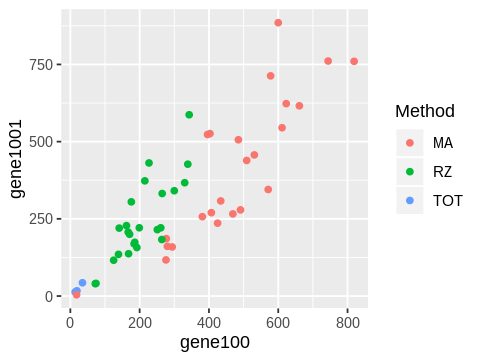

In [9]:
ggplot(df, aes(x=gene100, y=gene1001, color=Method)) + 
geom_point()
ggsave('figs/fig1.png')

**2**. Make a boxplot plot of gene100 counts by method.

Saving 6.67 x 6.67 in image


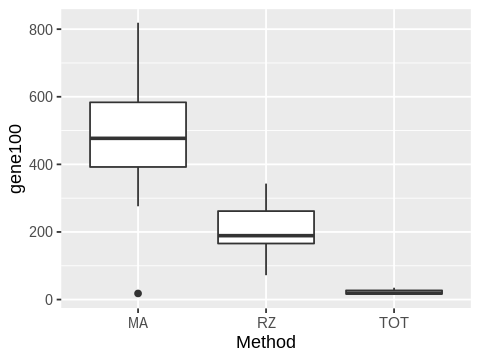

In [11]:
ggplot(df, aes(x=Method, y=gene100)) +
geom_boxplot()
ggsave('figs/fig2.png')

**3**. Make a jitter plot of gene100 counts by Media and color the points by method. Set the jitter width to be 0.2.

Saving 6.67 x 6.67 in image


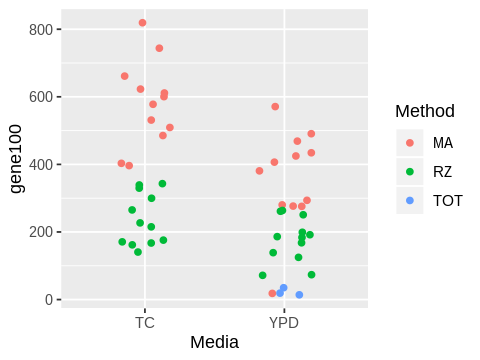

In [13]:
ggplot(df, aes(x=Media, y=gene100, color=Method)) +
geom_jitter(width=0.2)
ggsave('figs/fig3.png')

**4**. Make a grid of histograms of counts for gene100, with rows showing the person and columns showing the method used.

Saving 6.67 x 6.67 in image


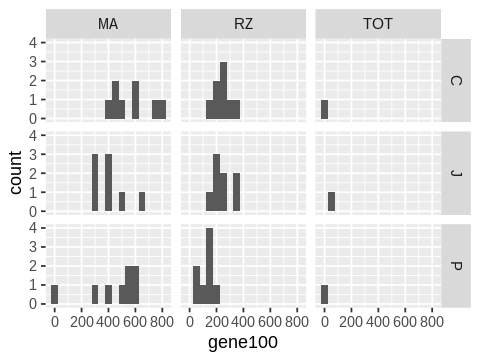

In [16]:
ggplot(df, aes(x=gene100)) +
facet_grid(Person ~ Method) +
geom_histogram(binwidth=50) 
ggsave('figs/fig4.png')

**5**. Make a row of boxplots of log counts of the top 5 genes where each column shows a different method.

**Warning**: This involves quite a bit of data processing.

In [17]:
genes.top5 <- df %>% 
select(starts_with('gene')) %>% 
summarize_all(mean) %>% 
gather() %>% 
arrange(desc(value)) %>%
head(5)

In [18]:
genes.top5

key      value    
1 gene1139 884531.49
2 gene1136 484816.47
3 gene7418 132744.71
4 gene363   62325.08
5 gene7387  45986.86

In [19]:
genes.top5$key

[1] "gene1139" "gene1136" "gene7418" "gene363"  "gene7387"

Saving 6.67 x 6.67 in image


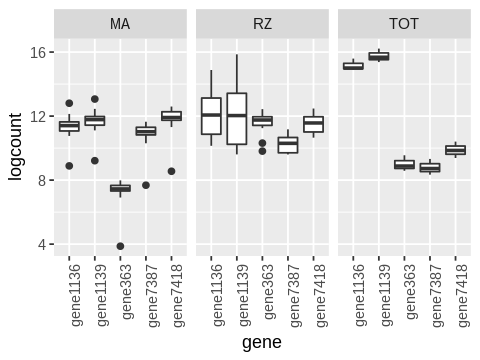

In [22]:
df %>% 
select(c('Method', genes.top5$key)) %>%
gather(gene, count, -Method) %>%
mutate(logcount = log(count)) %>%
ggplot(aes(x=gene, y=logcount)) +
geom_boxplot() + 
facet_wrap(~ Method) +
theme(axis.text.x = element_text(angle = 90, hjust = 1))
ggsave('figs/fig5.png')